In [23]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**Negative Binomial Regression**


used for the discrete data when the variation is expected to be high.
prog categorical variable
Predictor Variables: continous Catogerical binary

Response: count Variables

In [24]:
df=pd.read_excel('CDAC_DataBook.xlsx',sheet_name='neg_bin')

In [25]:
df.head()

,math,prog,daysabs
0,63,Academic,4
1,27,Academic,4
2,20,Academic,2
3,16,Academic,3
4,2,Academic,3


In [26]:
from statsmodels.discrete.discrete_model import NegativeBinomial as ngb

In [27]:
prog_dummy = pd.get_dummies(df['prog'],drop_first=True)
prog_dummy.head()

,General,Vocational
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [28]:
df = df.drop('prog',axis=1)
df.head()

,math,daysabs
0,63,4
1,27,4
2,20,2
3,16,3
4,2,3


In [29]:
df = pd.concat([df, prog_dummy],axis=1)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('daysabs',axis=1),df['daysabs'],test_size=0.25)

In [31]:
x_train = sm.add_constant(x_train,prepend=False)

In [32]:
df_train=pd.concat([x_train,y_train], axis=1)

In [33]:
df_train

,math,General,Vocational,const,daysabs
313,77,0,1,1.0,2
88,84,0,1,1.0,4
123,84,0,0,1.0,6
97,11,0,0,1.0,11
250,41,0,1,1.0,0
...,...,...,...,...,...
204,44,0,0,1.0,1
251,41,0,1,1.0,4
180,57,0,0,1.0,2
175,65,0,1,1.0,0


In [34]:
mod1=ngb.from_formula('daysabs ~ math + General + Vocational', data=df_train).fit()

Optimization terminated successfully.
         Current function value: 2.674717
         Iterations: 15
         Function evaluations: 22
         Gradient evaluations: 22


In [35]:
print(mod1.summary())

                     NegativeBinomial Regression Results                      
Dep. Variable:                daysabs   No. Observations:                  235
Model:               NegativeBinomial   Df Residuals:                      231
Method:                           MLE   Df Model:                            3
Date:                Thu, 22 Jun 2023   Pseudo R-squ.:                 0.03556
Time:                        18:41:02   Log-Likelihood:                -628.56
converged:                       True   LL-Null:                       -651.74
Covariance Type:            nonrobust   LLR p-value:                 4.769e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0866      0.147     14.203      0.000       1.799       2.375
math          -0.0058      0.003     -2.064      0.039      -0.011      -0.000
General        0.4065      0.214      1.895      0.0

what is null hypothesis, what do we do with it

predictor(maths) doesnot have influence on daysabsent.
p value < 0.05, Ho gets rejected, marks do affect the days of absent(for math score sign of coefficient is negative means if maths score increases, daysabs decreases)
maths m reference variable 0 hoga
how does maths score affect your absentism.

G > A

relation b/w vocational and academic

In [36]:
y_pred=mod1.predict(x_test)

In [37]:
y_pred=round(mod1.predict(x_test))

In [38]:
y_pred

239     3.0
276     2.0
126    11.0
243     3.0
12      5.0
       ... 
135     7.0
31      7.0
37      5.0
46      5.0
190     3.0
Length: 79, dtype: float64

In [1]:
import os

In [2]:
os.getcwd()

'/content'

In [4]:
os.chdir(r'/content/drive/MyDrive/STATSCDAC')

In [5]:
os.getcwd()

'/content/drive/MyDrive/STATSCDAC'

**DECISION TREE:**
Decision Tree Analysis
used primarily when your response is categorical data
supervised(response is known)
pureNode - no uncertainity(100% yes or 100% No)
pureSplit/ VerticalSplit, standard deviation = root [p*(1-p)]
resultant gain less or more
certaininity is lowest when it is 1 and 0
information gain is high where uncertaininity is low

In [6]:
import numpy as np
import pandas as pd
import statsmodels
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [55]:
df=pd.read_excel('CDAC_DataBook.xlsx',sheet_name='iris')
df

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
x_train=df.drop('Species',axis=1)

In [58]:
y_train=df.Species

In [59]:
mod1 = DecisionTreeClassifier().fit(x_train,y_train)

In [84]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Species',axis=1),df['Species'],test_size=0.25)

In [61]:
y_pred=mod1.predict(x_test)

In [62]:
print(confusion_matrix(y_test,y_pred))

[[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


In [63]:
from sklearn.tree import export_graphviz

In [64]:
import pydotplus

In [65]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [66]:
export_graphviz(mod1,out_file='Myfile.dot')

we need to check the Decision Tree on this web site -- http://webgraphviz.com/

In [67]:
x_train.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width
4,5.0,3.6,1.4,0.2
28,5.2,3.4,1.4,0.2
149,5.9,3.0,5.1,1.8
43,5.0,3.5,1.6,0.6
113,5.7,2.5,5.0,2.0


In [68]:
x_train.shape

(112, 4)

---------------END-----------------

In [19]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
pip install DecisionTreeClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
pip install RandomForestClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement RandomForestClassifier (from versions: none)
ERROR: No matching distribution found for RandomForestClassifier


In [77]:
from sklearn.tree import DecisionTreeClassifier

#Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [85]:
mod1 = DecisionTreeClassifier().fit(x_train,y_train)

In [86]:
y_pred = mod1.predict(x_test)
#max_depth = that means we do not want to go to max depth.
#min_sample_leaf =

In [88]:
mod2 = rfc(n_estimators = 20).fit(x_train,y_train)

In [89]:
y_pred = mod2.predict(x_test)

In [90]:
print(confusion_matrix(y_test,y_pred))

[[19  0  0]
 [ 0 11  1]
 [ 0  1  6]]


**Bayes Theorem**
scaling of variables
when there is huge difference in magnitude of predictors and responses, we have to scale up/down predictors response

In [1]:
import matplotlib
from matplotlib import pyplot as plt
import pylab
from pylab import plot, show
from pylab import legend, title, xlabel, ylabel
import numpy as np
import pandas as pd

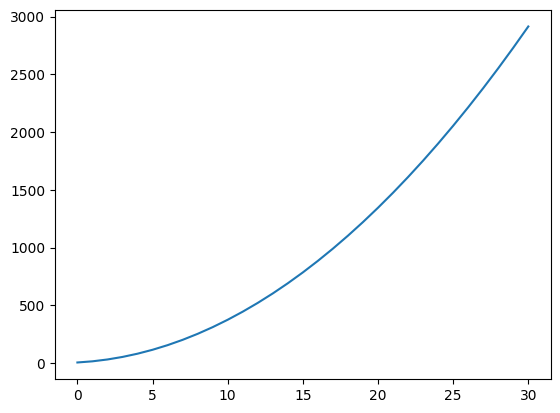

In [2]:
# y = 3x**2 + 7x + 5
x_pts = list(range(0,31))
y_pts = []
for x in x_pts:
    y = 3*x**2+7*x+5
    y_pts.append(y)
plot(x_pts,y_pts)

In [3]:
x1 = [31.3,37.3,47.2,51.0,63.5,71.3,72.3,72.7,66.0,57.0,45.3,31,1]
x1

[31.3, 37.3, 47.2, 51.0, 63.5, 71.3, 72.3, 72.7, 66.0, 57.0, 45.3, 31, 1]

In [4]:
len(x1)

13

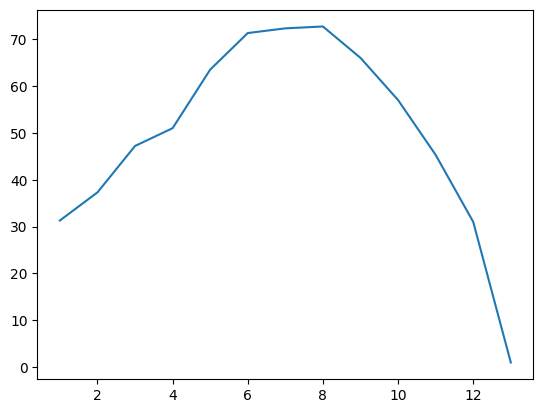

In [5]:
months = list(range(1,14))
plot(months,x1)

In [28]:
#Revenues are comming from 3 different sources.
x1=[31.3,37.3,47.2,51.0,63.5,71.3,72.3,72.7,66.0,57.0,45.3,31.1]
x2=[71.3,62.3,72.7,86.0,57.0,55.3,41.1,71.3,72.3,72.7,66.0,57.0]
x3=[31.3,37.3,67.2,51.0,63.5,71.3,62.3,72.7,86.0,57.0,55.3,41.1]
len(x1)

12

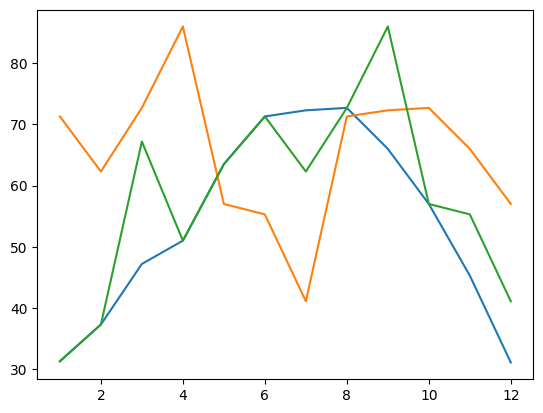

In [30]:
plot(months,x1,months,x2,months,x3)

Text(0, 0.5, 'Revenue')

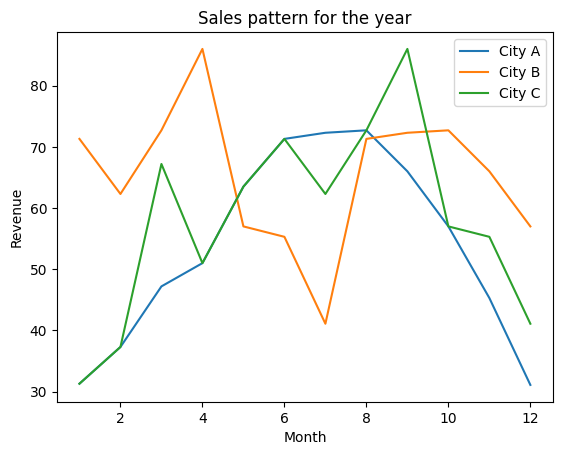

In [29]:
months = list(range(1,13))
plot(months,x1,months,x2,months,x3)
legend(['City A','City B','City C'])
title('Sales pattern for the year')
xlabel('Month')
ylabel('Revenue')
#This is called as line graph.
#x-axis data is the attribute data
#y-axis data is the continuous data

line graph is used to see relation b/w continous and discrete data
mostly it is used when the time pattern changes

SCATTERED GRAPH:

used when both x axis and y axis values are continous data
weight on x axis and mpg on y axis

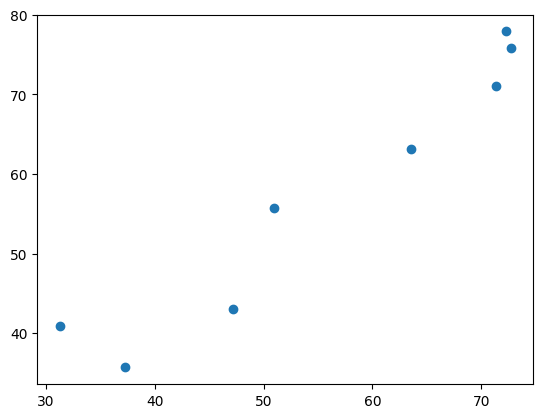

In [8]:
#Scattered Graph
#This graph do not the discrete data , it has only continuous data.
plt.scatter(x1,x2)

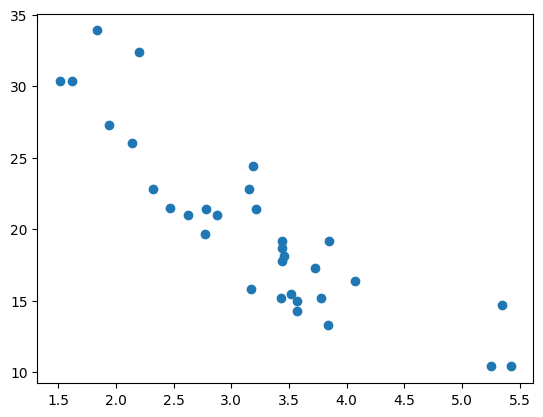

In [10]:
import os
os.chdir(r'/content/drive/MyDrive/STATSCDAC')
df = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='mtcars')
plt.scatter(df.wt,df.mpg)

**Bar Chart**

A bar chart is used to display categorical data on x-axis which can have multiple values.
no touching b/w different bars | bars will not touch each other
A bar chart is used to display categorical data. The x-axis of a bar chart represents different categories or groups, while the y-axis represents the values or frequencies associated with each category.
Each category is represented by a separate bar, and the height or length of the bar corresponds to the value or frequency of that category.
The bars in a bar chart are typically separated by gaps to emphasize the distinct categories.
Bar charts are useful for comparing values or frequencies across different categories.
width of the graph will always be same

**Histogram**

A histogram is used to display continuous or interval data.
The x-axis of a histogram represents the range or intervals of the data, while the y-axis represents the frequency or count of occurrences within each interval.
Instead of distinct bars, a histogram consists of contiguous rectangles or bars where the width of each bar represents the interval and the height represents the frequency.
The bars in a histogram are usually adjacent to one another without any gaps, as the intervals represent a continuous range of values.
Histograms are helpful in visualizing the distribution, shape, and central tendency of data, especially when dealing with large data sets.
width of histogram may vary

<BarContainer object of 5 artists>

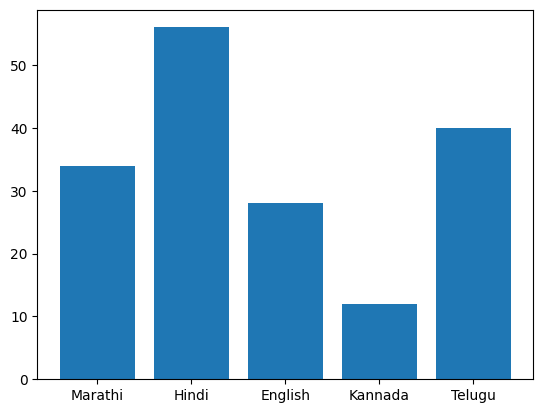

In [11]:
#Bar Chart and Histogram.
# On bar chart on x-axis it is used for categorical data, it can be of multiple variable.
# Even if it is true it is not touched to each other.
# It is discrete data.

#Histograms
#In histogram we create the bins.
#Histograms are made of continuous data.
#Histogram is touched to each other.

#on Y-axis variable is always be the count frequency that is same in bar and histogram.

# Example :

cts = [34,56,28,12,40]
languages = ['Marathi','Hindi','English','Kannada','Telugu']
plt.bar(languages,cts)



([<matplotlib.patches.Wedge at 0x7faa97908610>,
 [Text(0.8899186877588753, 0.6465637858537406, 'Marathi'),
  Text(-0.7259170302424207, 0.8264650417313637, 'Hindi'),
  Text(-0.8397380409695981, -0.7105209515197577, 'English'),
  Text(-0.14189900211144976, -1.0908091827628583, 'Kannada'),
  Text(0.8129099109773235, -0.7410650960845749, 'Telugu')])

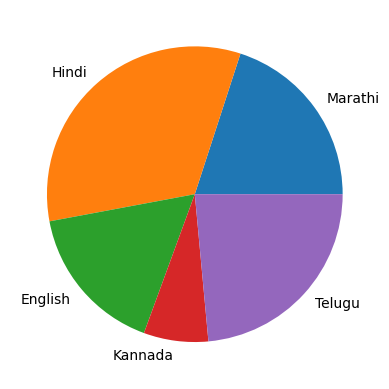

In [12]:
plt.pie(cts,labels = languages)

<BarContainer object of 5 artists>

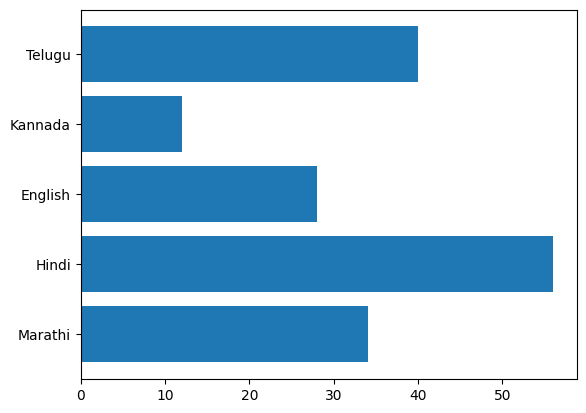

In [13]:
plt.barh(languages,cts)

In [14]:
df = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='diabetes')
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.63,50,1
1,85,66,29,0,26.6,0.35,31,0
2,183,64,0,0,23.3,0.67,32,1
3,89,66,23,94,28.1,0.17,21,0
4,137,40,35,168,43.1,2.29,33,1


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

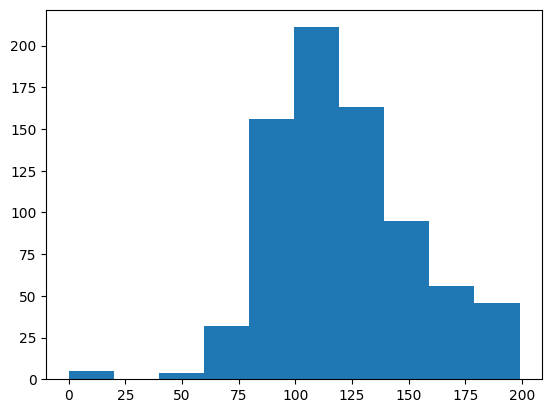

In [15]:
x = list(df.Glucose)
plt.hist(x)

(array([197., 211., 314.,  46.]),
 array([  0., 100., 120., 180., 200.]),
 <BarContainer object of 4 artists>)

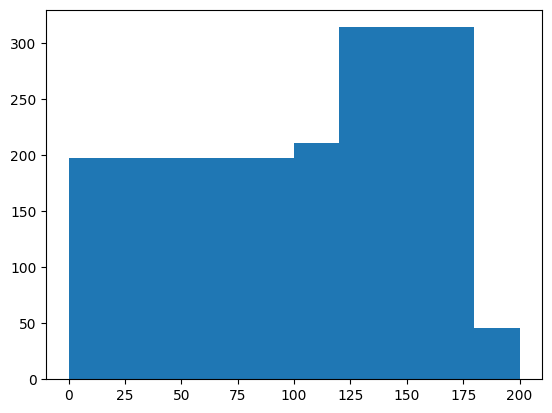

In [16]:
plt.hist(x, bins=[0,100,120,180,200])
#In case of histogram it is possible to have unequal bins.

In [17]:
df = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='nominal')
df.head()

,ses,write,math,prog
0,1,35,41,1
1,2,33,41,2
2,3,39,44,3
3,1,37,42,1
4,2,31,40,2


In [18]:
x1 = list(df.write)
#x1

In [19]:
x2 = list(df.math)
#x2

{'whiskers': [<matplotlib.lines.Line2D at 0x7faa974a11b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7faa974a16f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faa974a1000>],
 'medians': [<matplotlib.lines.Line2D at 0x7faa974a1c30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faa974a1ed0>],
 'means': []}

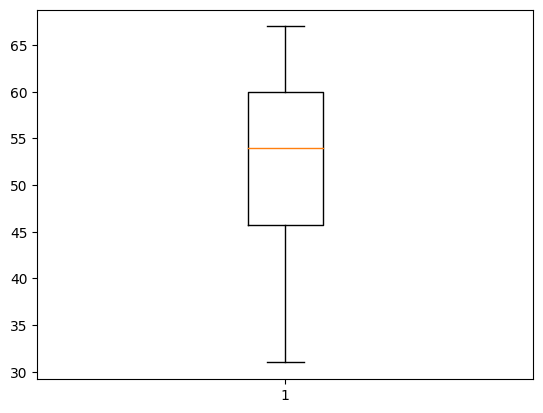

In [20]:
plt.boxplot(x1)

{'whiskers': [<matplotlib.lines.Line2D at 0x7faa97518f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7faa97519450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faa97518c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7faa97519990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faa97519c30>],
 'means': []}

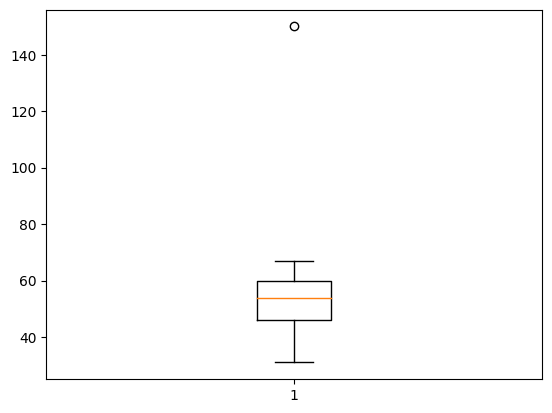

In [21]:
x1.append(150)
plt.boxplot(x1)

#O is outlier.

{'whiskers': [<matplotlib.lines.Line2D at 0x7faa9755beb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7faa9755aa40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faa9755bc10>,
 'medians': [<matplotlib.lines.Line2D at 0x7faa97588850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7faa97588af0>,
 'means': []}

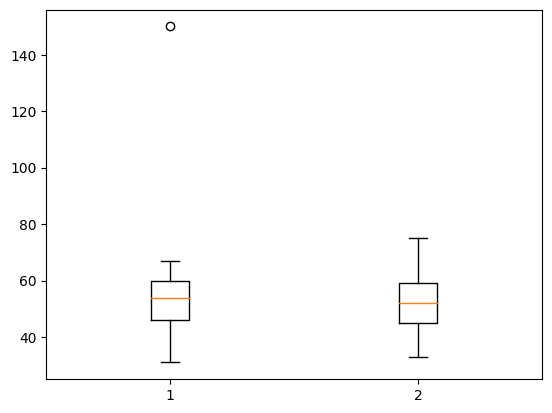

In [22]:
x = [x1,x2]
plt.boxplot(x)

In [23]:
#To get the corelate coefficient of the data.
df = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='mtcars')
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

In [24]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [25]:
df = [['hp','wt','qsec']]
df

[['hp', 'wt', 'qsec']]

In [26]:
import seaborn as sb

<Axes: >

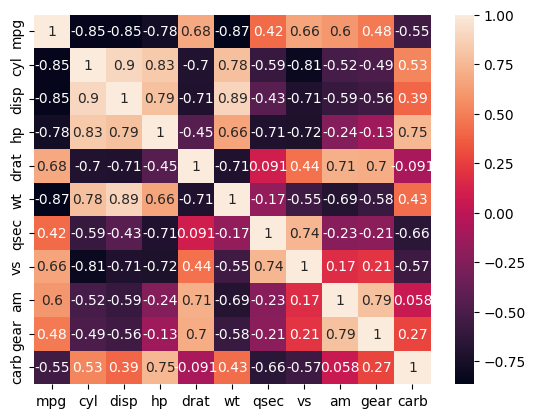

In [27]:
df = pd.read_excel('CDAC_DataBook.xlsx',sheet_name='mtcars')
sb.heatmap(df.corr(),annot=True)
#heatmap is doing same rows and same column
#diagonal elements it is always be one.
#0.74 corresponds to vs and qsec that means 0.74 is correlation of vs and qsec
